In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,  accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "class"])

In [85]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [87]:
df.describe(include='all')

,Sepal Length,Sepal Width,Petal Length,Petal Width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [88]:
df.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'class'], dtype='object')

In [89]:
df.shape

(150, 5)

# data visualization

In [90]:
count=df['class'].value_counts()
count.to_frame()

,class
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [91]:
label = count.index.tolist()
val = count.values.tolist()

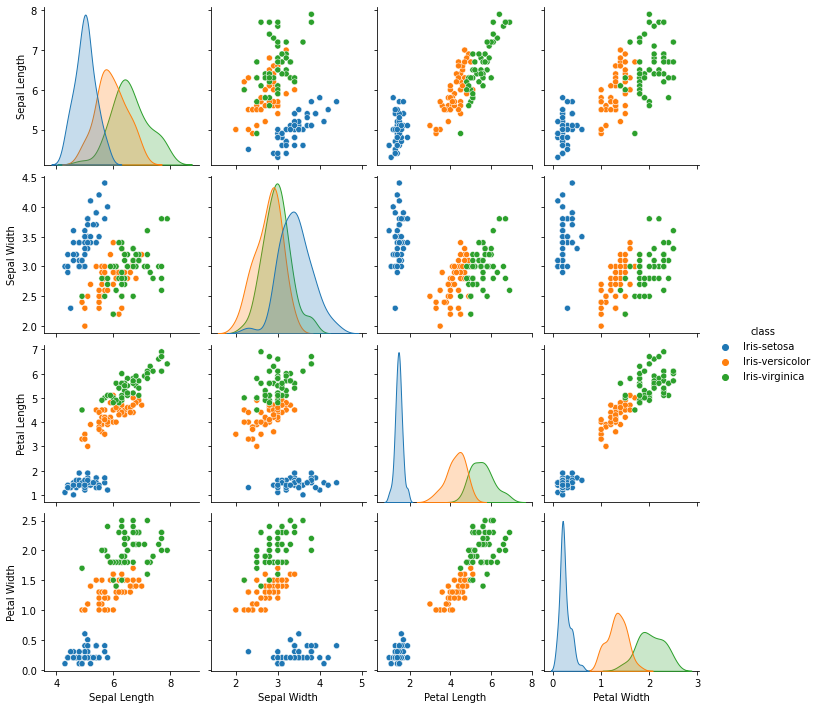

In [92]:
sns.pairplot(data=df, hue='class')
plt.show()

<AxesSubplot:>

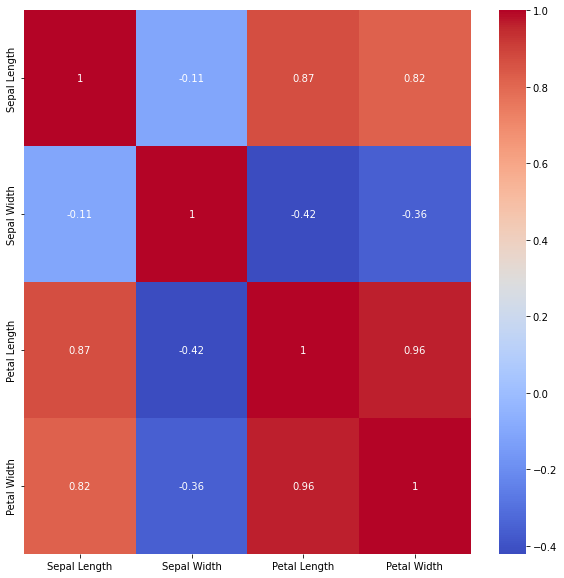

In [93]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [94]:
x=df.iloc[:, 0:4]
x.head()  

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
y = (df.iloc[:, 4])
y.head().to_frame()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [96]:
std =  StandardScaler()
x = std.fit_transform(x)

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)

# model creation

In [98]:
model=DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

# prediction

In [99]:
y_pred = model.predict(x_test)
y_pred 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

# Accuracy

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
acc = accuracy_score(y_test, y_pred)
print(acc*100)

95.55555555555556


# visualization

In [102]:
from sklearn.tree import plot_tree

In [103]:
col = df.columns.tolist()

In [104]:
lst = df['class'].unique().tolist()
print(lst)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


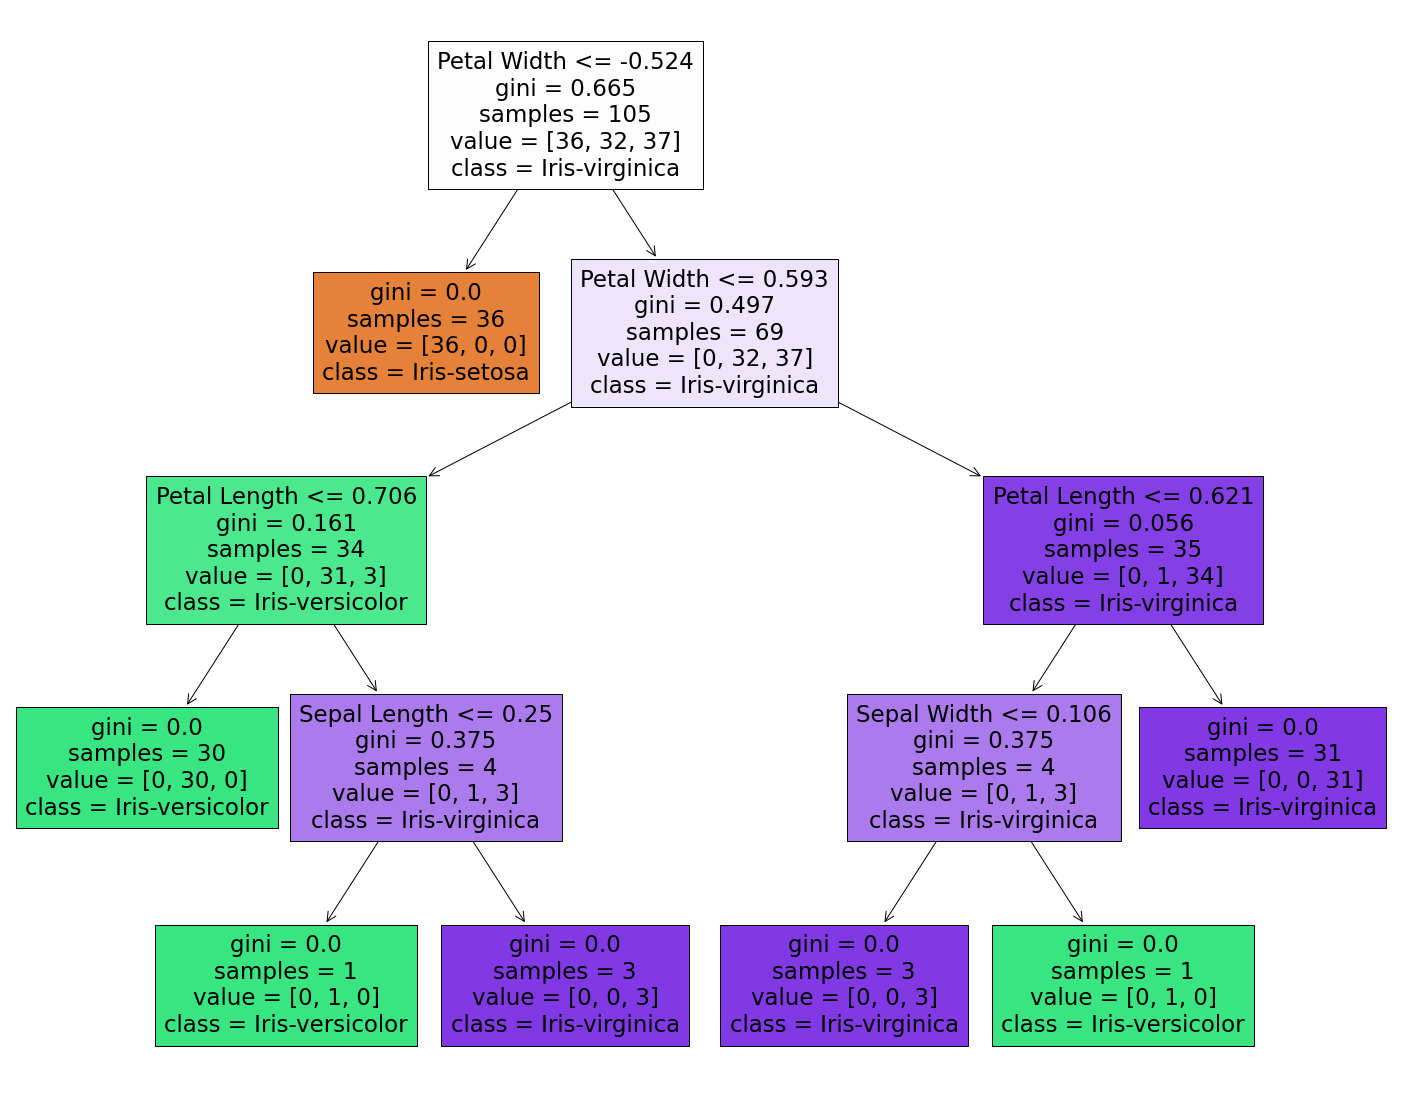

In [105]:
fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(model, feature_names = col, class_names = lst, filled = True)